# Final activity 1.4. Support Vector Machines

## Integrants:
*   Abraham Isidoro Muñoz
*   Diego Fernando Arriaza Alonzo
*   Gregorio Alberto Alvarez Alvarez 
*   José Luis Ramírez Lira 

### April 2023

# Problem 1: Basic Exercises of SVM in Scikit-Learn
## Read and reproduce the following examples carefully, then complete the mathematical deductions and code descriptions. Upload your results to Github in the form of a Jupyter notebook, then make it interactive using Binder, hence submit your results through both links. The use of Google Colab is highly recommended.

# 1. First, the Support Vector Machines basics for Scikit Learn and all the examples therein.

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

The advantages of support vector machines are:

Effective in high dimensional spaces.

Still effective in cases where number of dimensions is greater than the number of samples.

Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:

If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.

SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).

The support vector machines in scikit-learn support both dense (numpy.ndarray and convertible to that by numpy.asarray) and sparse (any scipy.sparse) sample vectors as input. However, to use an SVM to make predictions for sparse data, it must have been fit on such data. For optimal performance, use C-ordered numpy.ndarray (dense) or scipy.sparse.csr_matrix (sparse) with dtype=float64.

# 1.4.1. Classification¶
SVC, NuSVC and LinearSVC are classes capable of performing binary and multi-class classification on a dataset.

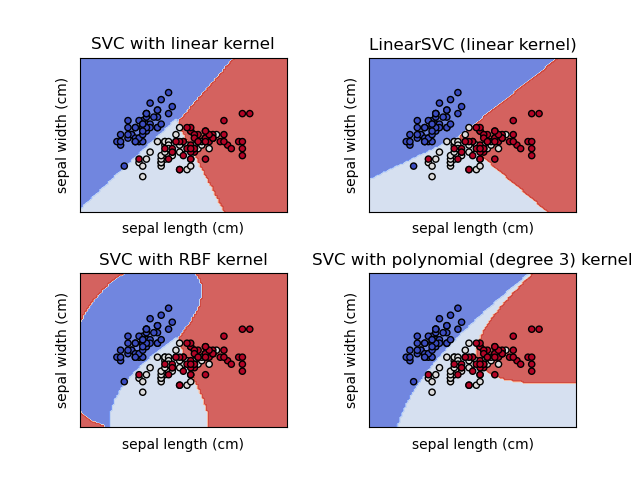

SVC and NuSVC are similar methods, but accept slightly different sets of parameters and have different mathematical formulations (see section Mathematical formulation). On the other hand, LinearSVC is another (faster) implementation of Support Vector Classification for the case of a linear kernel. Note that LinearSVC does not accept parameter kernel, as this is assumed to be linear. It also lacks some of the attributes of SVC and NuSVC, like support_.

As other classifiers, SVC, NuSVC and LinearSVC take as input two arrays: an array X of shape (n_samples, n_features) holding the training samples, and an array y of class labels (strings or integers), of shape (n_samples):

In [ ]:
from sklearn import svm
X = [[0, 0], [1, 1]]
y = [0, 1]
clf = svm.SVC()
clf.fit(X, y)

SVC()

After being fitted, the model can then be used to predict new values:

In [ ]:
clf.predict([[2., 2.]])

array([1])

SVMs decision function (detailed in the Mathematical formulation) depends on some subset of the training data, called the support vectors. Some properties of these support vectors can be found in attributes support_vectors_, support_ and n_support_:

In [ ]:
# get support vectors
clf.support_vectors_


array([[0., 0.],
       [1., 1.]])

In [ ]:
# get indices of support vectors
clf.support_


array([0, 1], dtype=int32)

In [ ]:
# get number of support vectors for each class
clf.n_support_

array([1, 1], dtype=int32)

# -----Examples-----

# Example 1 of 3: SVM: Maximum margin separating hyperplane¶
### Plot the maximum margin separating hyperplane within a two-class separable dataset using a Support Vector Machine classifier with linear kernel.

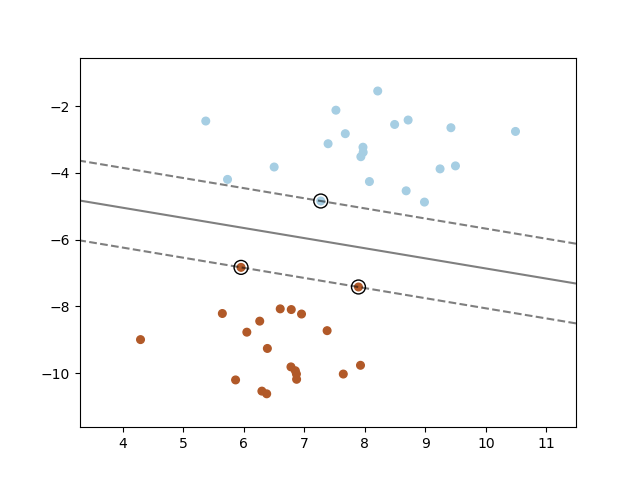

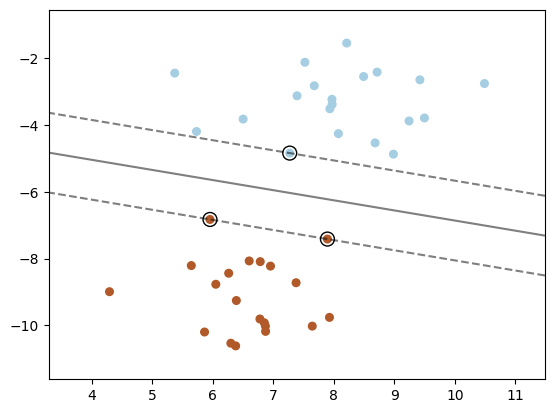

In [ ]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay


# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

# Example 2 of 3: SVM: Non-linear SVM <-- 4 for Activity
### Perform binary classification using non-linear SVC with RBF kernel. The target to predict is a XOR of the inputs.

The color map illustrates the decision function learned by the SVC.
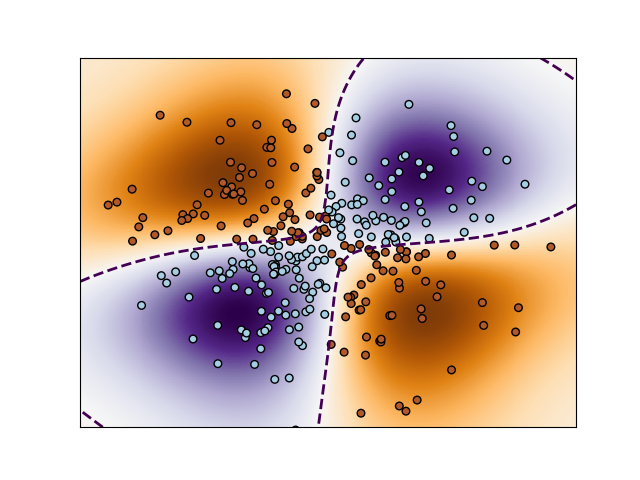


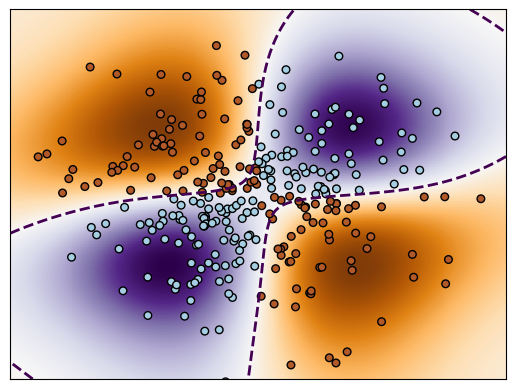

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# fit the model
clf = svm.NuSVC(gamma="auto")
clf.fit(X, Y)

# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    cmap=plt.cm.PuOr_r,
)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linestyles="dashed")
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired, edgecolors="k")
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

# Example 3 of 3: SVM-Anova: SVM with univariate feature selection
### This example shows how to perform univariate feature selection before running a SVC (support vector classifier) to improve the classification scores. We use the iris dataset (4 features) and add 36 non-informative features. We can find that our model achieves best performance when we select around 10% of features.

## Load some data to play with

In [ ]:
import numpy as np
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

# Add non-informative features
rng = np.random.RandomState(0)
X = np.hstack((X, 2 * rng.random((X.shape[0], 36))))

## Create the pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Create a feature-selection transform, a scaler and an instance of SVM that we
# combine together to have a full-blown estimator

clf = Pipeline(
    [
        ("anova", SelectPercentile(f_classif)),
        ("scaler", StandardScaler()),
        ("svc", SVC(gamma="auto")),
    ]
)

## Plot the cross-validation score as a function of percentile of features

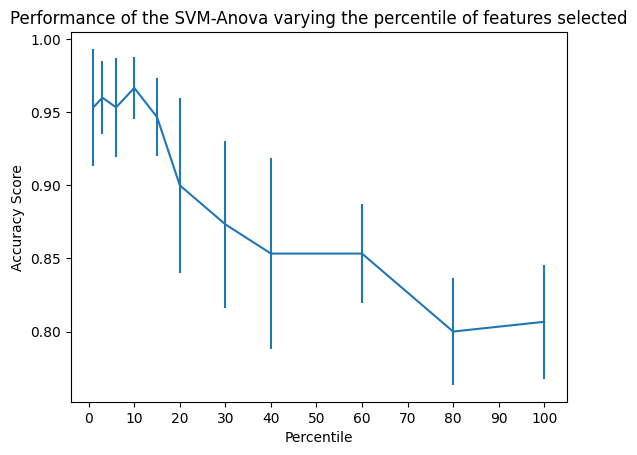

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

score_means = list()
score_stds = list()
percentiles = (1, 3, 6, 10, 15, 20, 30, 40, 60, 80, 100)

for percentile in percentiles:
    clf.set_params(anova__percentile=percentile)
    this_scores = cross_val_score(clf, X, y)
    score_means.append(this_scores.mean())
    score_stds.append(this_scores.std())

plt.errorbar(percentiles, score_means, np.array(score_stds))
plt.title("Performance of the SVM-Anova varying the percentile of features selected")
plt.xticks(np.linspace(0, 100, 11, endpoint=True))
plt.xlabel("Percentile")
plt.ylabel("Accuracy Score")
plt.axis("tight")
plt.show()

# One-class SVM with non-linear kernel (RBF). <-- 2 for Activity
An example using a one-class SVM for novelty detection.

One-class SVM is an unsupervised algorithm that learns a decision function for novelty detection: classifying new data as similar or different to the training set.

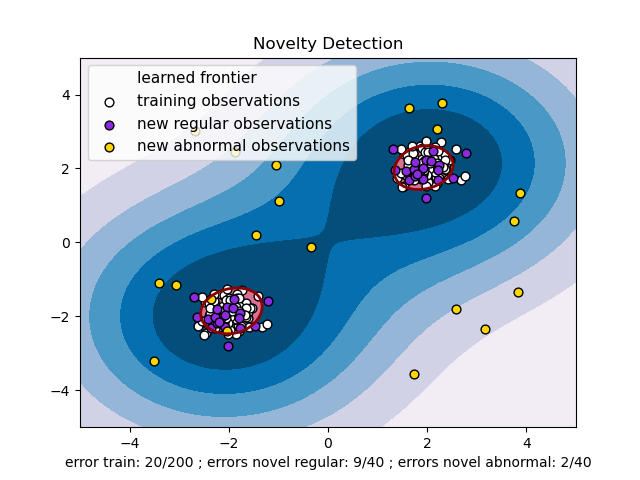

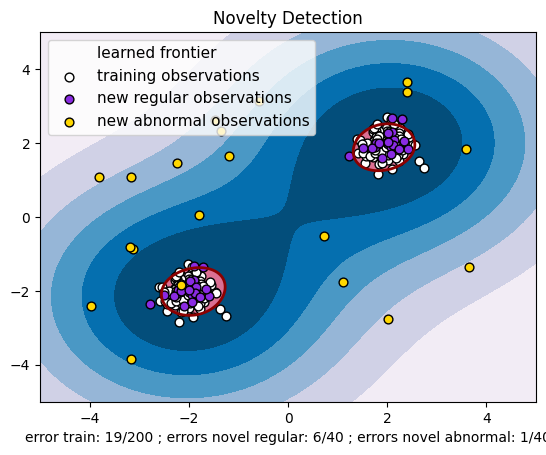

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
# Generate train data
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="darkred")
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors="palevioletred")

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=s, edgecolors="k")
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c="blueviolet", s=s, edgecolors="k")
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="gold", s=s, edgecolors="k")
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend(
    [a.collections[0], b1, b2, c],
    [
        "learned frontier",
        "training observations",
        "new regular observations",
        "new abnormal observations",
    ],
    loc="upper left",
    prop=matplotlib.font_manager.FontProperties(size=11),
)
plt.xlabel(
    "error train: %d/200 ; errors novel regular: %d/40 ; errors novel abnormal: %d/40"
    % (n_error_train, n_error_test, n_error_outliers)
)
plt.show()

# SVM Margins Example. <-- 3 for Activity
The plots below illustrate the effect the parameter C has on the separation line. A large value of C basically tells our model that we do not have that much faith in our data’s distribution, and will only consider points close to line of separation.

A small value of C includes more/all the observations, allowing the margins to be calculated using all the data in the area.

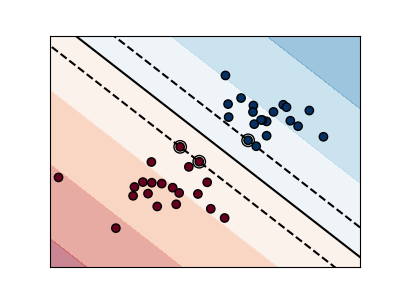

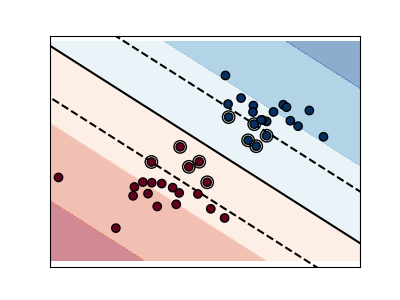

<ipython-input-47-3dcfd215d7b0>:52: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap("RdBu"),
<ipython-input-47-3dcfd215d7b0>:45: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-47-3dcfd215d7b0>:55: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  X[:, 0], X[:, 1], c=Y, zorder=10, cmap=cm.get_cmap("RdBu"), edgecolors="k"
<ipython-input-47-3dcfd215d7b0>:69: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` inst

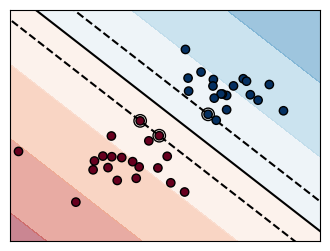

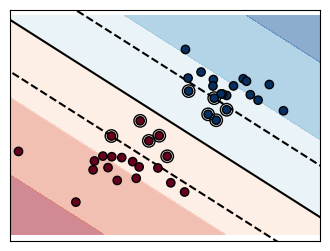

In [ ]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn import svm

# we create 40 separable points
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

# figure number
fignum = 1

# fit the model
for name, penalty in (("unreg", 1), ("reg", 0.05)):

    clf = svm.SVC(kernel="linear", C=penalty)
    clf.fit(X, Y)

    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(clf.coef_**2))
    yy_down = yy - np.sqrt(1 + a**2) * margin
    yy_up = yy + np.sqrt(1 + a**2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.plot(xx, yy, "k-")
    plt.plot(xx, yy_down, "k--")
    plt.plot(xx, yy_up, "k--")

    plt.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=80,
        facecolors="none",
        zorder=10,
        edgecolors="k",
        cmap=cm.get_cmap("RdBu"),
    )
    plt.scatter(
        X[:, 0], X[:, 1], c=Y, zorder=10, cmap=cm.get_cmap("RdBu"), edgecolors="k"
    )

    plt.axis("tight")
    x_min = -4.8
    x_max = 4.2
    y_min = -6
    y_max = 6

    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # Put the result into a contour plot
    plt.contourf(XX, YY, Z, cmap=cm.get_cmap("RdBu"), alpha=0.5, linestyles=["-"])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1

plt.show()

# SVM Tie Breaking Example <- 5 for Activity

Tie breaking is costly if decision_function_shape='ovr', and therefore it is not enabled by default. This example illustrates the effect of the break_ties parameter for a multiclass classification problem and decision_function_shape='ovr'.

The two plots differ only in the area in the middle where the classes are tied. If break_ties=False, all input in that area would be classified as one class, whereas if break_ties=True, the tie-breaking mechanism will create a non-convex decision boundary in that area.

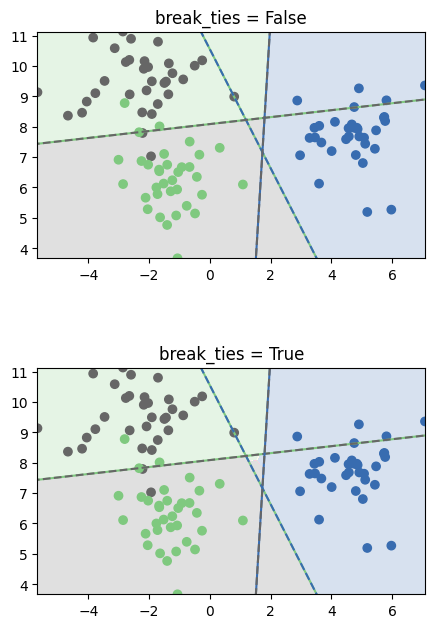

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=27)

fig, sub = plt.subplots(2, 1, figsize=(5, 8))
titles = ("break_ties = False", "break_ties = True")

for break_ties, title, ax in zip((False, True), titles, sub.flatten()):

    svm = SVC(
        kernel="linear", C=1, break_ties=break_ties, decision_function_shape="ovr"
    ).fit(X, y)

    xlim = [X[:, 0].min(), X[:, 0].max()]
    ylim = [X[:, 1].min(), X[:, 1].max()]

    xs = np.linspace(xlim[0], xlim[1], 1000)
    ys = np.linspace(ylim[0], ylim[1], 1000)
    xx, yy = np.meshgrid(xs, ys)

    pred = svm.predict(np.c_[xx.ravel(), yy.ravel()])

    colors = [plt.cm.Accent(i) for i in [0, 4, 7]]

    points = ax.scatter(X[:, 0], X[:, 1], c=y, cmap="Accent")
    classes = [(0, 1), (0, 2), (1, 2)]
    line = np.linspace(X[:, 1].min() - 5, X[:, 1].max() + 5)
    ax.imshow(
        -pred.reshape(xx.shape),
        cmap="Accent",
        alpha=0.2,
        extent=(xlim[0], xlim[1], ylim[1], ylim[0]),
    )

    for coef, intercept, col in zip(svm.coef_, svm.intercept_, classes):
        line2 = -(line * coef[1] + intercept) / coef[0]
        ax.plot(line2, line, "-", c=colors[col[0]])
        ax.plot(line2, line, "--", c=colors[col[1]])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_title(title)
    ax.set_aspect("equal")

plt.show()

# Separating hyperplane for unbalanced classes <-- 6 for Activity

Find the optimal separating hyperplane using an SVC for classes that are unbalanced.

We first find the separating plane with a plain SVC and then plot (dashed) the separating hyperplane with automatically correction for unbalanced classes.

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay

# we create two clusters of random points
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(
    n_samples=[n_samples_1, n_samples_2],
    centers=centers,
    cluster_std=clusters_std,
    random_state=0,
    shuffle=False,
)



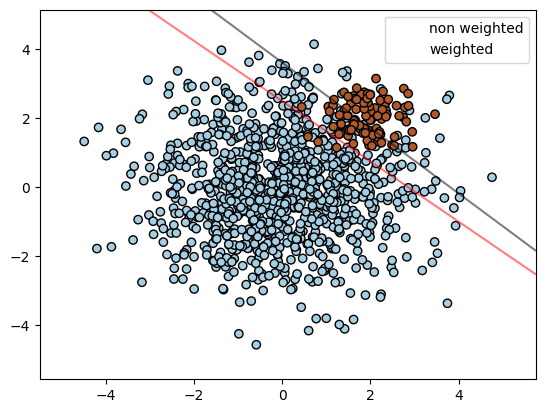

In [ ]:
# fit the model and get the separating hyperplane
clf = SVC(kernel="linear", C=1.0)
clf.fit(X, y)

# fit the model and get the separating hyperplane using weighted classes
wclf = SVC(kernel="linear", class_weight={1: 10})
wclf.fit(X, y)

# plot the samples
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k")

# plot the decision functions for both classifiers
ax = plt.gca()
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[0],
    alpha=0.5,
    linestyles=["-"],
    ax=ax,
)

# plot decision boundary and margins for weighted classes
wdisp = DecisionBoundaryDisplay.from_estimator(
    wclf,
    X,
    plot_method="contour",
    colors="r",
    levels=[0],
    alpha=0.5,
    linestyles=["-"],
    ax=ax,
)

plt.legend(
    [disp.surface_.collections[0], wdisp.surface_.collections[0]],
    ["non weighted", "weighted"],
    loc="upper right",
)
plt.show()

# SVM: Weighted samples <-- 7 for Activity

Plot decision function of a weighted dataset, where the size of points is proportional to its weight.

The sample weighting rescales the C parameter, which means that the classifier puts more emphasis on getting these points right. The effect might often be subtle. To emphasize the effect here, we particularly weight outliers, making the deformation of the decision boundary very visible.

In [ ]:
def plot_decision_function(classifier, sample_weight, axis, title):
    # plot the decision function
    xx, yy = np.meshgrid(np.linspace(-4, 5, 500), np.linspace(-4, 5, 500))

    Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # plot the line, the points, and the nearest vectors to the plane
    axis.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.bone)
    axis.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        s=100 * sample_weight,
        alpha=0.9,
        cmap=plt.cm.bone,
        edgecolors="black",
    )

    axis.axis("off")
    axis.set_title(title)



In [ ]:
# we create 20 points
np.random.seed(0)
X = np.r_[np.random.randn(10, 2) + [1, 1], np.random.randn(10, 2)]
y = [1] * 10 + [-1] * 10
sample_weight_last_ten = abs(np.random.randn(len(X)))
sample_weight_constant = np.ones(len(X))
# and bigger weights to some outliers
sample_weight_last_ten[15:] *= 5
sample_weight_last_ten[9] *= 15


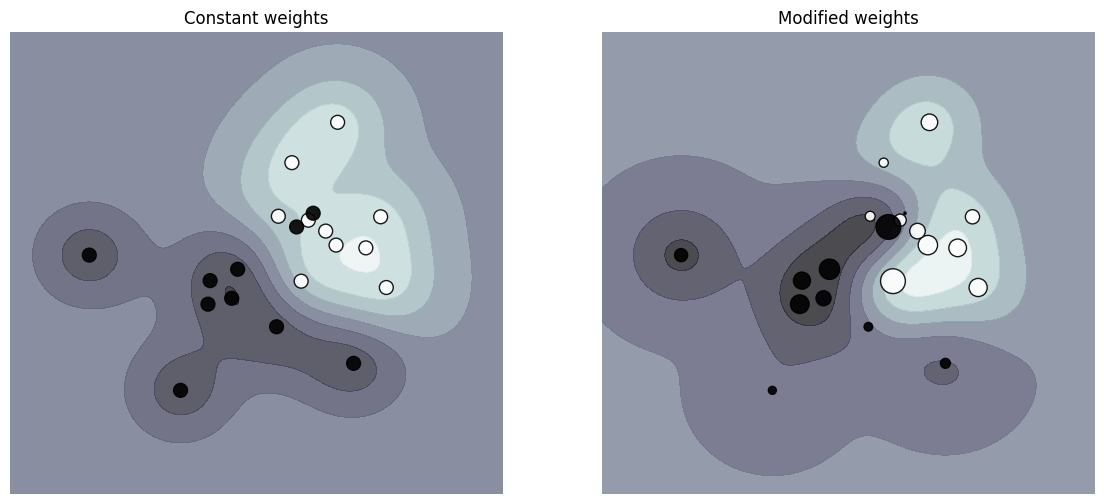

In [ ]:
# Fit the models.

# This model does not take into account sample weights.
clf_no_weights = SVC(gamma=1)
clf_no_weights.fit(X, y)

# This other model takes into account some dedicated sample weights.
clf_weights = SVC(gamma=1)
clf_weights.fit(X, y, sample_weight=sample_weight_last_ten)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plot_decision_function(
    clf_no_weights, sample_weight_constant, axes[0], "Constant weights"
)
plot_decision_function(clf_weights, sample_weight_last_ten, axes[1], "Modified weights")

plt.show()

# Outlier detection on a real data set. <-- 3 for Activity

This example illustrates the need for robust covariance estimation on a real data set. It is useful both for outlier detection and for a better understanding of the data structure.

We selected two sets of two variables from the Wine data set as an illustration of what kind of analysis can be done with several outlier detection tools. For the purpose of visualization, we are working with two-dimensional examples, but one should be aware that things are not so trivial in high-dimension, as it will be pointed out.

In both examples below, the main result is that the empirical covariance estimate, as a non-robust one, is highly influenced by the heterogeneous structure of the observations. Although the robust covariance estimate is able to focus on the main mode of the data distribution, it sticks to the assumption that the data should be Gaussian distributed, yielding some biased estimation of the data structure, but yet accurate to some extent. The One-Class SVM does not assume any parametric form of the data distribution and can therefore model the complex shape of the data much better.

## First example
The first example illustrates how the Minimum Covariance Determinant robust estimator can help concentrate on a relevant cluster when outlying points exist. Here the empirical covariance estimation is skewed by points outside of the main cluster. Of course, some screening tools would have pointed out the presence of two clusters (Support Vector Machines, Gaussian Mixture Models, univariate outlier detection, …). But had it been a high-dimensional example, none of these could be applied that easily.

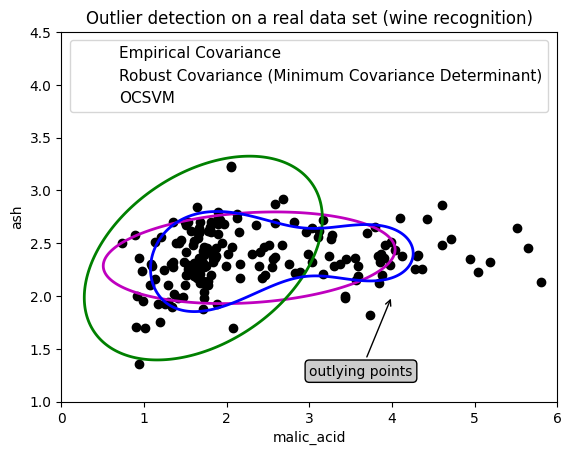

In [ ]:
# Author: Virgile Fritsch <virgile.fritsch@inria.fr>
# License: BSD 3 clause

import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn.datasets import load_wine

# Define "classifiers" to be used
classifiers = {
    "Empirical Covariance": EllipticEnvelope(support_fraction=1.0, contamination=0.25),
    "Robust Covariance (Minimum Covariance Determinant)": EllipticEnvelope(
        contamination=0.25
    ),
    "OCSVM": OneClassSVM(nu=0.25, gamma=0.35),
}
colors = ["m", "g", "b"]
legend1 = {}
legend2 = {}

# Get data
X1 = load_wine()["data"][:, [1, 2]]  # two clusters

# Learn a frontier for outlier detection with several classifiers
xx1, yy1 = np.meshgrid(np.linspace(0, 6, 500), np.linspace(1, 4.5, 500))
for i, (clf_name, clf) in enumerate(classifiers.items()):
    plt.figure(1)
    clf.fit(X1)
    Z1 = clf.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
    Z1 = Z1.reshape(xx1.shape)
    legend1[clf_name] = plt.contour(
        xx1, yy1, Z1, levels=[0], linewidths=2, colors=colors[i]
    )

legend1_values_list = list(legend1.values())
legend1_keys_list = list(legend1.keys())

# Plot the results (= shape of the data points cloud)
plt.figure(1)  # two clusters
plt.title("Outlier detection on a real data set (wine recognition)")
plt.scatter(X1[:, 0], X1[:, 1], color="black")
bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")
plt.annotate(
    "outlying points",
    xy=(4, 2),
    xycoords="data",
    textcoords="data",
    xytext=(3, 1.25),
    bbox=bbox_args,
    arrowprops=arrow_args,
)
plt.xlim((xx1.min(), xx1.max()))
plt.ylim((yy1.min(), yy1.max()))
plt.legend(
    (
        legend1_values_list[0].collections[0],
        legend1_values_list[1].collections[0],
        legend1_values_list[2].collections[0],
    ),
    (legend1_keys_list[0], legend1_keys_list[1], legend1_keys_list[2]),
    loc="upper center",
    prop=matplotlib.font_manager.FontProperties(size=11),
)
plt.ylabel("ash")
plt.xlabel("malic_acid")

plt.show()

## Second example¶
The second example shows the ability of the Minimum Covariance Determinant robust estimator of covariance to concentrate on the main mode of the data distribution: the location seems to be well estimated, although the covariance is hard to estimate due to the banana-shaped distribution. Anyway, we can get rid of some outlying observations. The One-Class SVM is able to capture the real data structure, but the difficulty is to adjust its kernel bandwidth parameter so as to obtain a good compromise between the shape of the data scatter matrix and the risk of over-fitting the data.

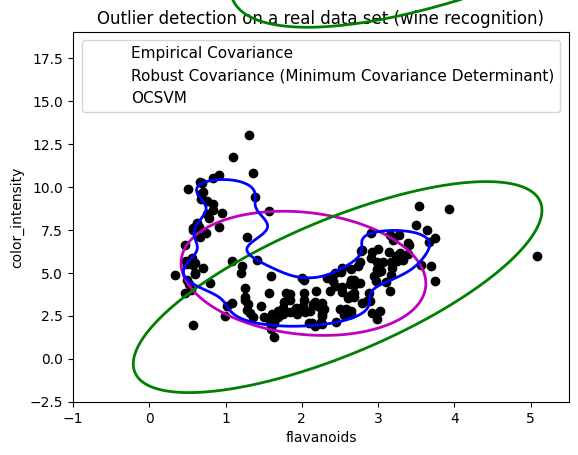

In [ ]:
# Get data
X2 = load_wine()["data"][:, [6, 9]]  # "banana"-shaped

# Learn a frontier for outlier detection with several classifiers
xx2, yy2 = np.meshgrid(np.linspace(-1, 5.5, 500), np.linspace(-2.5, 19, 500))
for i, (clf_name, clf) in enumerate(classifiers.items()):
    plt.figure(2)
    clf.fit(X2)
    Z2 = clf.decision_function(np.c_[xx2.ravel(), yy2.ravel()])
    Z2 = Z2.reshape(xx2.shape)
    legend2[clf_name] = plt.contour(
        xx2, yy2, Z2, levels=[0], linewidths=2, colors=colors[i]
    )

legend2_values_list = list(legend2.values())
legend2_keys_list = list(legend2.keys())

# Plot the results (= shape of the data points cloud)
plt.figure(2)  # "banana" shape
plt.title("Outlier detection on a real data set (wine recognition)")
plt.scatter(X2[:, 0], X2[:, 1], color="black")
plt.xlim((xx2.min(), xx2.max()))
plt.ylim((yy2.min(), yy2.max()))
plt.legend(
    (
        legend2_values_list[0].collections[0],
        legend2_values_list[1].collections[0],
        legend2_values_list[2].collections[0],
    ),
    (legend2_keys_list[0], legend2_keys_list[1], legend2_keys_list[2]),
    loc="upper center",
    prop=matplotlib.font_manager.FontProperties(size=11),
)
plt.ylabel("color_intensity")
plt.xlabel("flavanoids")

plt.show()


# Plot different SVM classifiers in the iris dataset <-- 9 for Activity

Comparison of different linear SVM classifiers on a 2D projection of the iris dataset. We only consider the first 2 features of this dataset:

* Sepal length

* Sepal width

This example shows how to plot the decision surface for four SVM classifiers with different kernels.

The linear models LinearSVC() and SVC(kernel='linear') yield slightly different decision boundaries. This can be a consequence of the following differences:

* LinearSVC minimizes the squared hinge loss while SVC minimizes the regular hinge loss.

* LinearSVC uses the One-vs-All (also known as One-vs-Rest) multiclass reduction while SVC uses the One-vs-One multiclass reduction.

Both linear models have linear decision boundaries (intersecting hyperplanes) while the non-linear kernel models (polynomial or Gaussian RBF) have more flexible non-linear decision boundaries with shapes that depend on the kind of kernel and its parameters.

## Note: while plotting the decision function of classifiers for toy 2D datasets can help get an intuitive understanding of their respective expressive power, be aware that those intuitions don’t always generalize to more realistic high-dimensional problems.

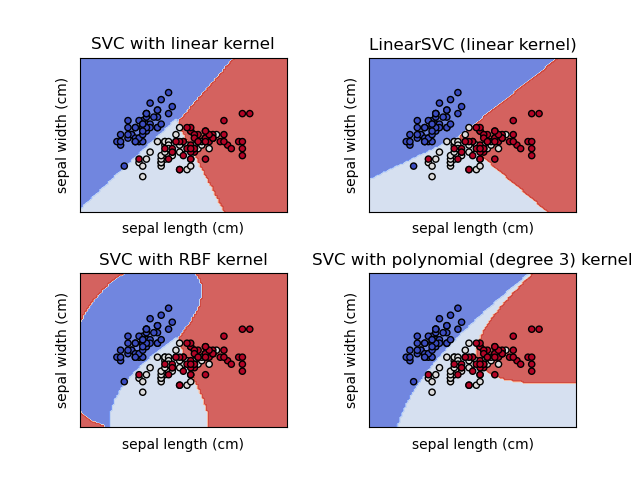

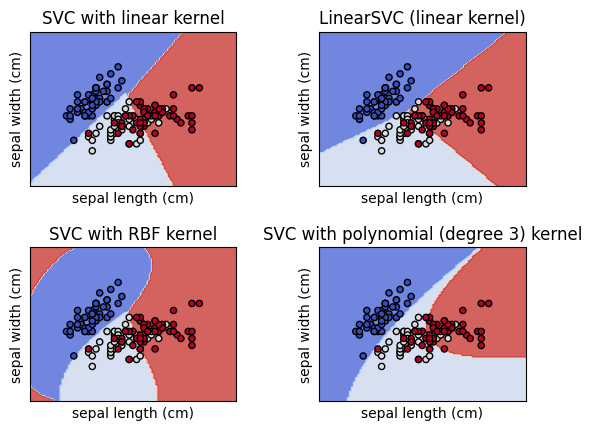

In [ ]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.inspection import DecisionBoundaryDisplay


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()